[  1.00846326e-01   1.18095729e-01   9.54866733e-02   1.60738975e-01
   3.29513318e-02   3.43591442e-02   1.58800042e-02   7.70504307e-02
   8.24853567e-02   8.47522349e-02   9.74632321e-03   8.27640270e-02
   4.76801599e-02   5.70035537e-02   1.59730645e-04]
predator
0    45
1    56
dtype: int64


hair
SpearmanrResult(correlation=-0.73258778661739732, pvalue=3.1290653783993741e-18)
feathers
SpearmanrResult(correlation=0.0088766773556485015, pvalue=0.92979655119958504)
eggs
SpearmanrResult(correlation=0.81928161033778346, pvalue=1.1862425751843183e-25)
milk
SpearmanrResult(correlation=-0.88602402841593764, pvalue=8.058542759064926e-35)
airborne
SpearmanrResult(correlation=0.13879487486098507, pvalue=0.16629153218712339)
aquatic
SpearmanrResult(correlation=0.38184803173653636, pvalue=8.1431844535820631e-05)
predator
SpearmanrResult(correlation=0.061563567576583031, pvalue=0.54081202136473938)
toothed
SpearmanrResult(correlation=-0.53523530011039688, pvalue=8.0919166202364018e-09)
backbone
SpearmanrResult(correlation=-0.69048340463918823, pvalue=1.363539936243545e-15)
breathes
SpearmanrResult(correlation=-0.53825771452414539, pvalue=6.423619490396211e-09)
venomous
SpearmanrResult(correlation=0.31763855899012994, pvalue=0.0012090017908679522)
fins
SpearmanrResult(correlation=0.15694

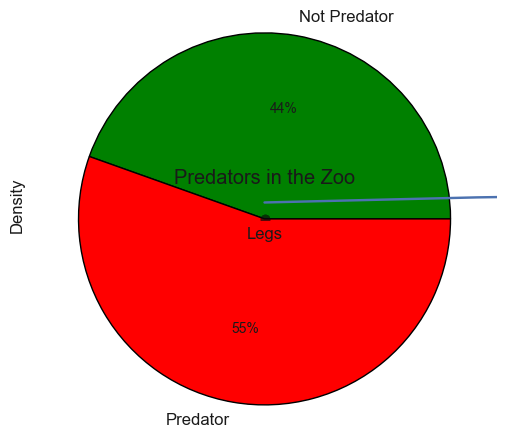

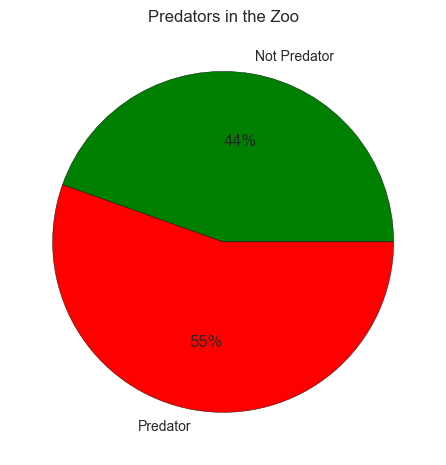

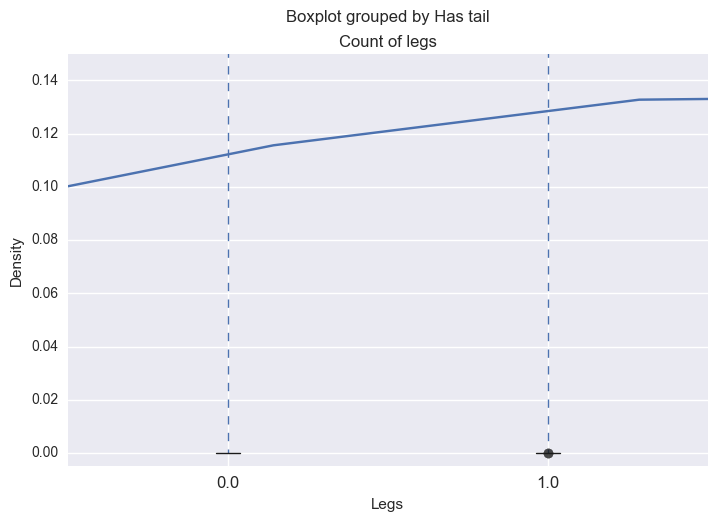

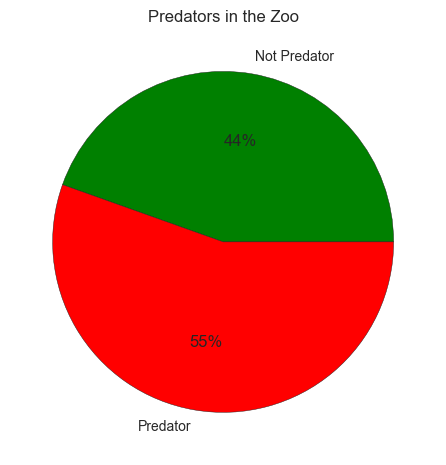

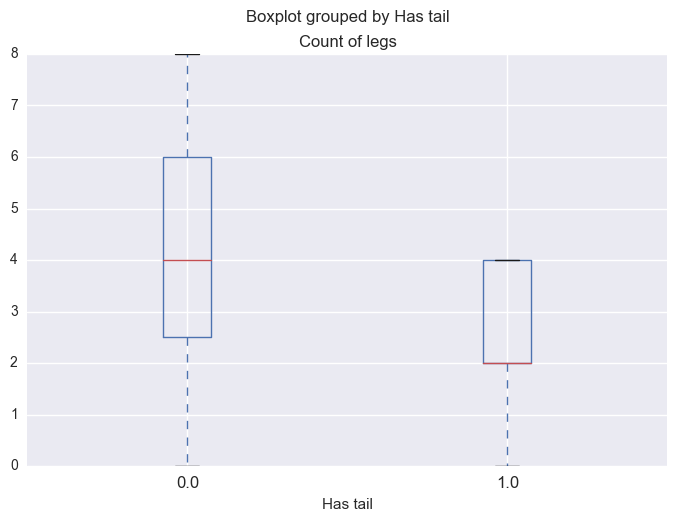

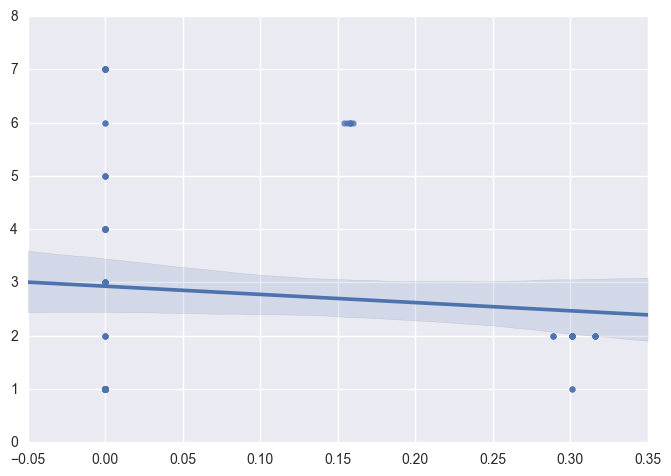

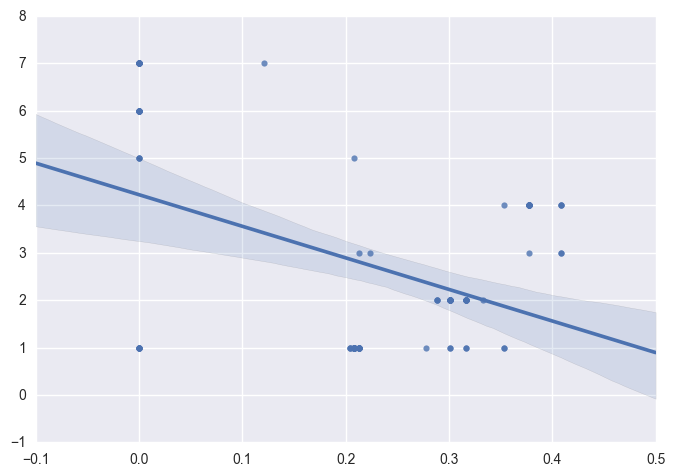

End


In [3]:
import numpy as np
import urllib

import pandas
import scipy
import seaborn as seaborn
from pandas import read_csv
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
import numpy.random as nr
from sklearn.neighbors.kde import KernelDensity

arr_cols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# url with dataset
url = 'zoo.csv'
# download the file
raw_data = urllib.urlopen('datasets/' + url)
# load the CSV file as a numpy matrix
dataset = np.loadtxt(raw_data, delimiter=',',
                     skiprows=1,
                     # converters={0: lambda x: datetime.strptime(x, "%d-%m-%Y %H-%M-%S")}
                     usecols=arr_cols
                     )

# separate the data from the target attributes
X = dataset[:, 0:15]
y = dataset[:, 16]
#
# # normalize the data attributes
normalized_X = preprocessing.normalize(X)
# standardize the data attributes
standardized_X = preprocessing.scale(X)

model = ExtraTreesClassifier()
model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)

# print (standardized_X)

# ------------ Graphs --------

# density plots
legs = X[:, 12]  # legs
legs = legs.reshape(-1, 1)

kde = KernelDensity(bandwidth=2).fit(legs)
x = np.linspace(legs.min(), legs.max(), 8).reshape(-1, 1)
density = np.exp(kde.score_samples(x))

plt.plot(x, density)
plt.plot(legs, legs * 0, 'ok', alpha=.05)
plt.ylim(-.005, .15)

plt.xlabel('Legs')
plt.ylabel('Density')
# plt.show()

# -------------------------
zoo_csv_data = read_csv('datasets/zoo.csv')
predator_g = zoo_csv_data.groupby(['predator']).size()
names = zoo_csv_data.animal_name

print predator_g
plt.figure()
plt.subplot(aspect=True)
plt.pie(predator_g, labels=['Not Predator', 'Predator'],
        colors=['green', 'red'],
        autopct='%i%%')
plt.title('Predators in the Zoo')
# plt.show()

# ---------------
# mean, median, mode,variation, range

column_names = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
                'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic']
value_names = ['Mean', 'Median', 'Mode', 'Range', 'Variance', 'Skewness', 'Kurtosis']

data_table = []
for x in column_names:
    temp = []
    data_column = zoo_csv_data[x]

    temp.append(np.mean(data_column))
    temp.append(np.median(data_column))
    temp.append(scipy.stats.mstats.mode(data_column))
    temp.append(np.ptp(data_column))
    temp.append(np.var(data_column))
    temp.append(scipy.stats.skew(data_column))
    temp.append(scipy.stats.kurtosis(data_column))
    data_table.append(temp)

# print pandas.DataFrame(data_table, column_names, value_names)

# ----------  Box Plots
box_plot = pandas.DataFrame(zip(X[:, 12], X[:, 13]), columns=['Count of legs', 'Has tail'])
box_plot.boxplot(column='Count of legs', by='Has tail')
# plt.show()

# ------- Pearson
for x in column_names:
    # print x
    data_column = zoo_csv_data[x]
    p_c = np.corrcoef(data_column, y)
    # print p_c

# ----- spearmanr
for x in column_names:
    print x
    data_column = zoo_csv_data[x]
    s_c = scipy.stats.spearmanr(data_column, y)
    print s_c


# ------------ scatter_plot
plt.figure()
seaborn.regplot(normalized_X[:, 4], y)
plt.show()

plt.figure()
seaborn.regplot(normalized_X[:, 13], y)
plt.show()

print ('End')